In [304]:
%reset -f
# Load libraries
from sklearn import linear_model, datasets

# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [305]:
# cross-validated LogisticRegression

cList = []
for k in [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]:
    for j in [1,1.25,2.5,3.75,5,6.25,7.5,8.75]:
        cList.append(j*k)

intModel = linear_model.LogisticRegressionCV(Cs=100, multi_class='multinomial', cv=5)
listModel = linear_model.LogisticRegressionCV(Cs=cList, multi_class='multinomial', cv=5)
regModel = linear_model.LogisticRegressionCV(multi_class='multinomial', cv=5)

In [306]:
intModel.fit(X,y)
yp = intModel.predict(X)
print 'intModel:', 1.0*sum(y==yp)/y.shape[0]

listModel.fit(X,y)
yp = listModel.predict(X)
print 'listModel:', 1.0*sum(y==yp)/y.shape[0]

regModel.fit(X,y)
yp = regModel.predict(X)
print 'regModel:', 1.0*sum(y==yp)/y.shape[0]

intModel: 0.986666666667
listModel: 0.986666666667
regModel: 0.98


In [307]:
intModel.C_

array([ 5.85702082,  5.85702082,  5.85702082])

In [308]:
listModel.C_

array([ 6.25,  6.25,  6.25])

In [309]:
regModel.C_

array([ 21.5443469,  21.5443469,  21.5443469])

In [310]:
# regular LogisticRegression (no cross-validation)

thisModel = linear_model.LogisticRegression(C=100., multi_class='multinomial', solver='lbfgs')
thisModel.fit(X,y)
yp = thisModel.predict(X)
print 'thisModel:', 1.0*sum(yp==y)/y.shape[0]

thisModel: 0.986666666667


In [311]:
thisModel.C

100.0

C = 0.0001:	0.7
C = 0.000125:	0.7
C = 0.00025:	0.713333333333
C = 0.000375:	0.713333333333
C = 0.0005:	0.733333333333
C = 0.000625:	0.733333333333
C = 0.00075:	0.733333333333
C = 0.000875:	0.74
C = 0.001:	0.753333333333
C = 0.00125:	0.76
C = 0.0025:	0.793333333333
C = 0.00375:	0.813333333333
C = 0.005:	0.84
C = 0.00625:	0.86
C = 0.0075:	0.86
C = 0.00875:	0.873333333333
C = 0.01:	0.873333333333
C = 0.0125:	0.886666666667
C = 0.025:	0.933333333333
C = 0.0375:	0.933333333333
C = 0.05:	0.94
C = 0.0625:	0.953333333333
C = 0.075:	0.96
C = 0.0875:	0.96
C = 0.1:	0.96
C = 0.125:	0.96
C = 0.25:	0.966666666667
C = 0.375:	0.966666666667
C = 0.5:	0.966666666667
C = 0.625:	0.973333333333
C = 0.75:	0.973333333333
C = 0.875:	0.973333333333
C = 1.0:	0.973333333333
C = 1.25:	0.98
C = 2.5:	0.986666666667
C = 3.75:	0.986666666667
C = 5.0:	0.986666666667
C = 6.25:	0.986666666667
C = 7.5:	0.98
C = 8.75:	0.98
C = 10.0:	0.98
C = 12.5:	0.98
C = 25.0:	0.98
C = 37.5:	0.98
C = 50.0:	0.98
C = 62.5:	0.98
C = 75.0:	

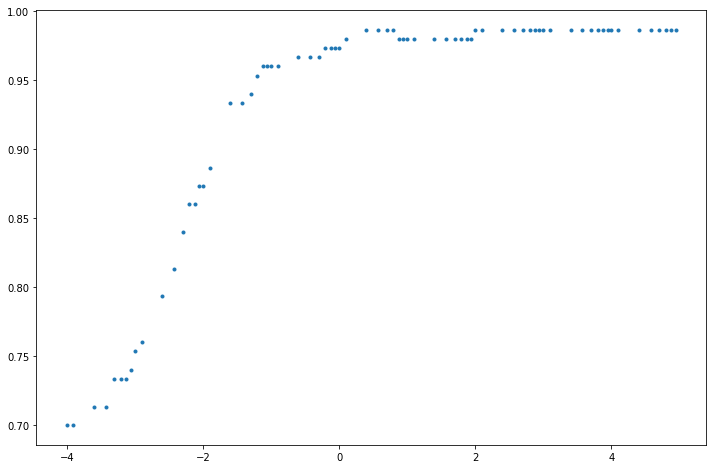

In [312]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
from math import log10

empList = []

for k in [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]:
    
    for j in [1,1.25,2.5,3.75,5,6.25,7.5,8.75]:
        m = j*k
        thisModel = linear_model.LogisticRegression(C=m, multi_class='multinomial', solver='lbfgs')
        thisModel.fit(X,y)
        yp = thisModel.predict(X)
        accr = 1.0*sum(yp==y)/y.shape[0]
        print 'C = ' + str(m) + ':\t', accr
        empList.append((m,accr))

plt.figure(figsize=(12,8))
plt.plot([log10(i[0]) for i in empList], [i[1] for i in empList], '.')
plt.show()